In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as onp
import networkx as nx
from GraphDiscovery import *
import pandas as pd
import pickle
import sympy
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
data=pd.read_csv('complex toy.csv')
with open("complex toy graph.p", 'rb') as f:  # notice the r instead of w
    true_graph = pickle.load(f)
X=data.to_numpy(dtype=onp.float32)[:100].T

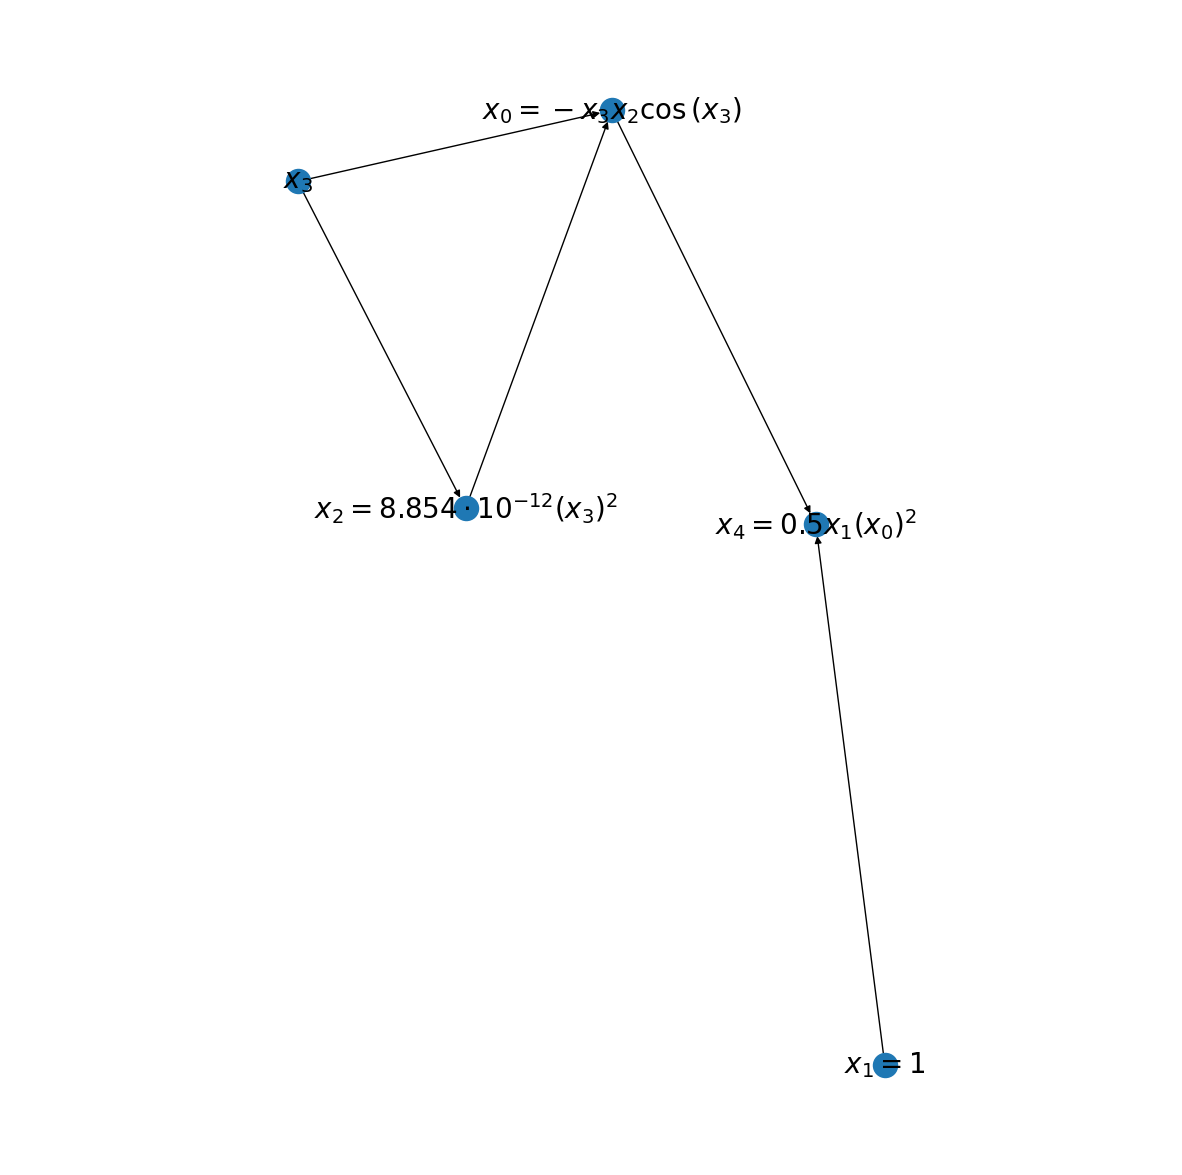

In [10]:
plt.figure(figsize=(15,15))
plt.margins(x=0.4)
nx.draw(true_graph,with_labels=True,labels=nx.get_node_attributes(true_graph,'equation'),font_size=20)

In [5]:
names=[f'x_{{{i}}}' for i in range(X.shape[0])]
beta=onp.array([1e-1,1e-2,1e-3])

In [11]:
GD = GraphDiscovery(X,names=names,beta=beta)


computing new K_mat
(100, 100)
(100, 100)
changing basis
changing basis
storing alpha of shape (3, 100)
is it done now ? 


In [12]:
GD.modes

level 1: 
array([LM(x_{0}), LM(x_{1}), LM(x_{2}), LM(x_{3}), LM(x_{4}), Cst()],
      dtype=object)
level 2: 
array([[QM(x_{0},x_{0}), QM(x_{1},x_{0}), QM(x_{2},x_{0}),
        QM(x_{3},x_{0}), QM(x_{4},x_{0}), Cst()],
       [QM(x_{1},x_{0}), QM(x_{1},x_{1}), QM(x_{2},x_{1}),
        QM(x_{3},x_{1}), QM(x_{4},x_{1}), Cst()],
       [QM(x_{2},x_{0}), QM(x_{2},x_{1}), QM(x_{2},x_{2}),
        QM(x_{3},x_{2}), QM(x_{4},x_{2}), Cst()],
       [QM(x_{3},x_{0}), QM(x_{3},x_{1}), QM(x_{3},x_{2}),
        QM(x_{3},x_{3}), QM(x_{4},x_{3}), Cst()],
       [QM(x_{4},x_{0}), QM(x_{4},x_{1}), QM(x_{4},x_{2}),
        QM(x_{4},x_{3}), QM(x_{4},x_{4}), Cst()],
       [Cst(), Cst(), Cst(), Cst(), Cst(), Cst()]], dtype=object)
level 3: 
array([NLM(x_{0}), NLM(x_{1}), NLM(x_{2}), NLM(x_{3}), NLM(x_{4}), Cst()],
      dtype=object)

In [13]:
GD.alphas.shape

(3, 100)

In [14]:
GD.modes.mode_containers[0].K_mat

array([[1237.24511315, -601.76536275, -149.31142245],
       [-601.76536275,  692.36126346,  -17.46756383],
       [-149.31142245,  -17.46756383,   38.32540007]])

In [18]:
GD.modes.get_K_except_index(1)

[[[ 1.23724511e+03 -6.01765363e+02 -1.49311422e+02]
  [-6.01765363e+02  6.92361263e+02 -1.74675638e+01]
  [-1.49311422e+02 -1.74675638e+01  3.83254001e+01]]

 [[ 4.44719853e+04  6.10217470e+03  1.48811555e+03]
  [ 6.10217470e+03  8.37303227e+02  2.04190182e+02]
  [ 1.48811555e+03  2.04190182e+02  4.97952141e+01]]

 [[ 3.08027817e+02 -4.22605351e+02  2.49933966e+01]
  [-4.22605351e+02  8.45910026e+02 -1.47572717e+02]
  [ 2.49933966e+01 -1.47572717e+02  1.56167239e+02]]]


array([[ 5.68752392e+02,  4.22605351e-01, -2.49933966e-02],
       [ 4.22605351e-01,  7.84550686e+01,  1.47572717e-01],
       [-2.49933966e-02,  1.47572717e-01,  4.48665939e+00]])

varphi_ga [-6.09615522e-09 -2.69501536e-09 -4.54867520e-09]
level 1: 
array([LM(x_{1}), LM(x_{2}), LM(x_{3}), LM(x_{4}), Cst()], dtype=object)
level 2: 
array([[QM(x_{1},x_{1}), QM(x_{2},x_{1}), QM(x_{3},x_{1}),
        QM(x_{4},x_{1}), Cst()],
       [QM(x_{2},x_{1}), QM(x_{2},x_{2}), QM(x_{3},x_{2}),
        QM(x_{4},x_{2}), Cst()],
       [QM(x_{3},x_{1}), QM(x_{3},x_{2}), QM(x_{3},x_{3}),
        QM(x_{4},x_{3}), Cst()],
       [QM(x_{4},x_{1}), QM(x_{4},x_{2}), QM(x_{4},x_{3}),
        QM(x_{4},x_{4}), Cst()],
       [Cst(), Cst(), Cst(), Cst(), Cst()]], dtype=object)
level 3: 
array([NLM(x_{1}), NLM(x_{2}), NLM(x_{3}), NLM(x_{4}), Cst()],
      dtype=object)
computing new K_mat
matrix [[123.72451132 -60.17653627 -14.93114224]
 [-60.17653627  69.23612635  -1.74675638]
 [-14.93114224  -1.74675638   3.83254001]]
yb [0.01853609 0.01814112 0.08048267]
Eb 5.27978992717368e-10
level: 1 activation noise:0.00
activations [-8.72964401e-09 -8.72964401e-09  9.98645764e-01 -8.72964401e-09
 -1

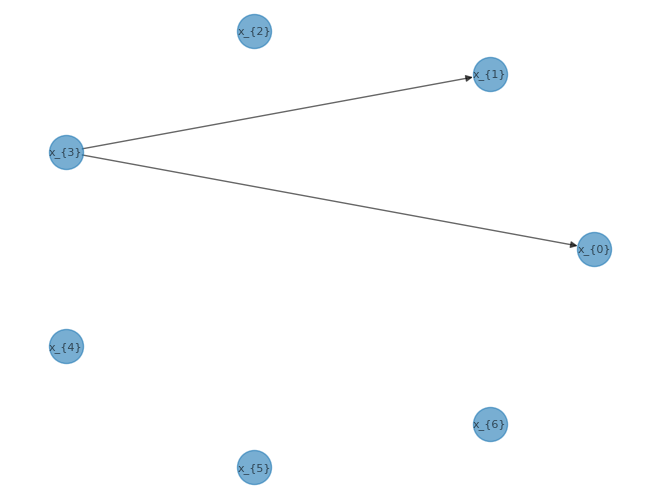

In [17]:
GD.examine_node(0,1e-10,verbose=False)